In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import bartlett
import seaborn as sns
import scipy.stats as stats
# import shap
#Time Series Analysis
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, ccf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_csv('active_df(회귀모델용).csv')

In [3]:
df.pop('diff_humidity')
df.pop('diff_temp')

0         NaN
1        0.00
2        0.00
3        0.00
4        0.00
         ... 
20263    0.50
20264   -0.17
20265    0.17
20266    0.92
20267   -0.17
Name: diff_temp, Length: 20268, dtype: float64

In [4]:
len(df['id'].unique())

231

In [5]:
df.columns

Index(['create_dt', 'humidity', 'currenttemperature',
       'airstate.tempstate.target', 'pm1', 'pm2', 'pm10', 'sensory_temp', 'DI',
       'airstate.opmode', 'airstate.windstrength', 'airstate.opmode2', 'day',
       'hour', 'weekday', 'weekend', 'Clid', 'energywatt',
       'prior_airstate.opmode2', 'prior_currenttemperature',
       'prior_energywatt', 'prior_airstate.tempstate.target',
       'prior_airstate.windstrength', 'prior_humidity', 'id', 'inefficiency'],
      dtype='object')

In [6]:
df.isnull().sum()

create_dt                           0
humidity                            0
currenttemperature                  0
airstate.tempstate.target           0
pm1                                 0
pm2                                 0
pm10                                0
sensory_temp                        0
DI                                  0
airstate.opmode                     0
airstate.windstrength               0
airstate.opmode2                    0
day                                 0
hour                                0
weekday                             0
weekend                             0
Clid                                0
energywatt                          0
prior_airstate.opmode2             95
prior_currenttemperature           95
prior_energywatt                   95
prior_airstate.tempstate.target    95
prior_airstate.windstrength        95
prior_humidity                     95
id                                  0
inefficiency                        0
dtype: int64

In [7]:
df= df.dropna(axis=0)

In [8]:
df

,create_dt,humidity,currenttemperature,airstate.tempstate.target,pm1,pm2,pm10,sensory_temp,DI,airstate.opmode,...,Clid,energywatt,prior_airstate.opmode2,prior_currenttemperature,prior_energywatt,prior_airstate.tempstate.target,prior_airstate.windstrength,prior_humidity,id,inefficiency
1,2021-07-08 10:00:00,59.416667,23.00,23.0,0.0,0.0,0.0,27.414500,69.962592,0,...,14,30.083333,1.0,23.00,26.583333,23.0,0.0,60.750000,0031970b9f5ead744c0fa6b6c2e37d63d7d61e9268314a...,0
2,2021-07-08 11:00:00,59.666667,23.00,23.0,0.0,0.0,0.0,27.414500,69.983767,0,...,14,28.333333,1.0,23.00,30.083333,23.0,0.0,59.416667,0031970b9f5ead744c0fa6b6c2e37d63d7d61e9268314a...,0
3,2021-07-08 12:00:00,59.000000,23.00,23.0,0.0,0.0,0.0,27.414500,69.927300,0,...,14,32.500000,1.0,23.00,28.333333,23.0,0.0,59.666667,0031970b9f5ead744c0fa6b6c2e37d63d7d61e9268314a...,0
4,2021-07-08 13:00:00,62.000000,23.00,23.0,0.0,0.0,0.0,27.414500,70.181400,0,...,14,25.583333,1.0,23.00,32.500000,23.0,0.0,59.000000,0031970b9f5ead744c0fa6b6c2e37d63d7d61e9268314a...,0
5,2021-07-08 14:00:00,62.416667,22.67,23.0,0.0,0.0,0.0,27.207333,69.744567,0,...,14,29.166667,1.0,23.00,25.583333,23.0,0.0,62.000000,0031970b9f5ead744c0fa6b6c2e37d63d7d61e9268314a...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20263,2021-07-18 04:00:00,76.083333,25.50,26.0,0.0,0.0,0.0,27.414250,75.295108,1,...,14,13.583333,0.0,25.00,22.750000,26.0,1.0,74.500000,ffeaac61437d52a2f3d527ea5c1a642302a9b45a235340...,0
20264,2021-07-18 05:00:00,74.833333,25.33,26.0,0.0,0.0,0.0,27.229667,74.894183,1,...,14,15.000000,0.0,25.50,13.583333,26.0,1.0,76.083333,ffeaac61437d52a2f3d527ea5c1a642302a9b45a235340...,1
20265,2021-07-18 06:00:00,74.500000,25.50,26.0,0.0,0.0,0.0,27.414250,75.118100,1,...,14,17.916667,0.0,25.33,15.000000,26.0,1.0,74.833333,ffeaac61437d52a2f3d527ea5c1a642302a9b45a235340...,1
20266,2021-07-18 07:00:00,75.750000,26.42,27.0,0.0,0.0,0.0,28.429458,76.681750,1,...,14,9.416667,0.0,25.50,17.916667,26.0,1.0,74.500000,ffeaac61437d52a2f3d527ea5c1a642302a9b45a235340...,0


In [25]:
y_col = ['currenttemperature','humidity','energywatt']
X_col = ['prior_airstate.opmode2','prior_currenttemperature','prior_humidity','prior_energywatt','prior_airstate.tempstate.target','airstate.windstrength']

X=df.loc[:,X_col]
y=df.loc[:,y_col]

In [26]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full, y_train_full)

In [27]:
y_train

,currenttemperature,humidity,energywatt
14109,25.29,64.569527,49.046351
15551,25.75,53.624429,60.311644
7446,24.25,61.000000,41.160714
15009,25.00,60.916667,21.333333
12774,21.00,57.890411,38.194064
...,...,...,...
15672,25.04,74.931973,15.051020
10850,26.08,59.166667,26.500000
9307,25.00,67.333333,17.166667
1118,23.61,69.688284,29.046370


In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [29]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [50]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30,kernel_initializer='he_normal')(input_)
activation1 = keras.layers.LeakyReLU(alpha=0.2)(hidden1)
hidden2 = keras.layers.Dense(30,kernel_initializer='he_normal')(activation1)
activation2 = keras.layers.LeakyReLU(alpha=0.2)(hidden2)
output = keras.layers.Dense(3)(activation2)
model = keras.Model(inputs=[input_],outputs=[output])


In [51]:
model.compile(loss='mse',optimizer='adam')
history=model.fit(X_train,y_train,epochs=100,validation_data=(X_valid,y_valid),callbacks=early_stopping_cb)

Epoch 1/100
355/355 [==============================] - 0s 1ms/step - loss: 1061.6504 - val_loss: 198.5738
Epoch 2/100
355/355 [==============================] - 0s 1ms/step - loss: 138.8675 - val_loss: 96.2239
Epoch 3/100
355/355 [==============================] - 0s 1ms/step - loss: 84.6511 - val_loss: 72.4123
Epoch 4/100
355/355 [==============================] - 0s 1ms/step - loss: 68.4660 - val_loss: 62.3274
Epoch 5/100
355/355 [==============================] - 0s 1ms/step - loss: 61.3970 - val_loss: 57.0289
Epoch 6/100
355/355 [==============================] - 0s 1ms/step - loss: 57.2152 - val_loss: 54.3017
Epoch 7/100
355/355 [==============================] - 0s 1ms/step - loss: 54.6696 - val_loss: 52.1666
Epoch 8/100
355/355 [==============================] - 0s 1ms/step - loss: 52.9964 - val_loss: 50.8819
Epoch 9/100
355/355 [==============================] - 0s 1ms/step - loss: 51.8762 - val_loss: 50.5006
Epoch 10/100
355/355 [==============================] - 0s 1ms/step -

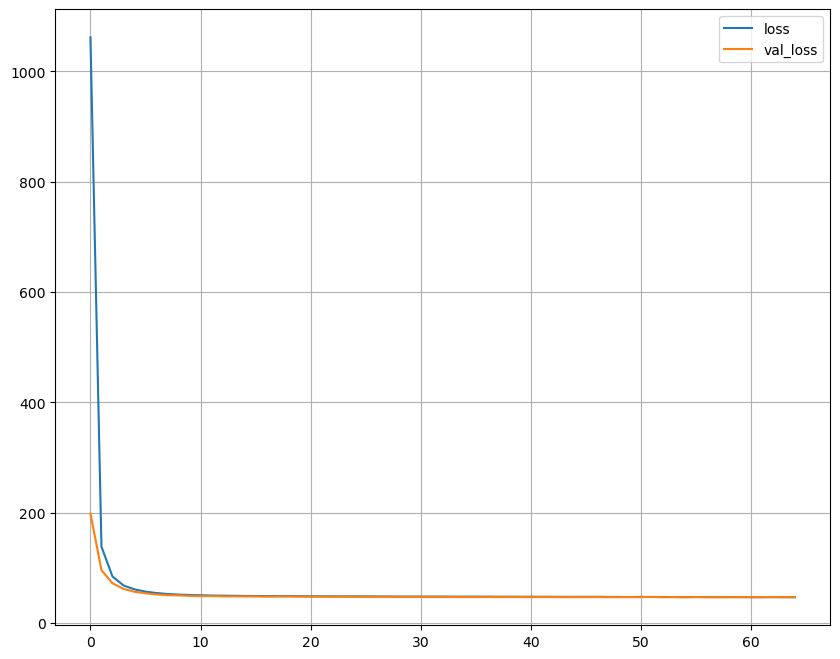

In [52]:
# 학습곡선
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(10,8))
plt.grid(True)
# plt.gca().set_ylim(0,1)  # 수직축의 범위를 [0~1] 사이로 설정
plt.show()

In [53]:
mse_test = model.evaluate(X_test,y_test)
print(mse_test)
X_new = X_test
y_pred = model.predict(X_new)
print(y_pred)

158/158 [==============================] - 0s 608us/step - loss: 50.0957
50.09571838378906
[[26.762589 65.310974 30.376322]
 [26.024061 71.59911  19.124075]
 [25.006872 66.65755  34.330036]
 ...
 [26.731585 77.8424   21.935472]
 [23.625683 68.1345   14.93659 ]
 [27.406012 64.728874 29.181194]]


In [55]:
y_test

,currenttemperature,humidity,energywatt
15059,27.02,64.430000,30.253333
6207,26.05,71.876667,18.553333
12318,25.42,68.083333,28.416667
10197,22.03,71.281609,24.544828
9833,25.58,77.166667,24.333333
...,...,...,...
8165,26.08,62.083333,57.833333
894,23.87,74.804408,21.964187
502,27.00,74.833333,21.250000
12873,23.00,68.000000,17.666667


In [47]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

2.3900423755210443

In [48]:
pd.DataFrame(y_pred)

,0,1,2
0,27.165796,64.481522,30.950602
1,26.038418,71.638458,19.086645
2,25.116943,67.010025,34.717167
3,22.473825,71.530373,25.156935
4,25.407286,65.578300,55.707756
...,...,...,...
5039,26.234488,63.151218,56.405994
5040,23.638208,73.973900,21.422628
5041,26.548716,78.100578,19.842474
5042,23.587637,68.685005,15.346106


In [43]:
y_pred

array([[27.165796, 64.48152 , 30.950605],
       [22.473824, 71.53037 , 25.156935]], dtype=float32)